In [ ]:
 from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
data, labels = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2)

In [ ]:
data

array([[ 1.00753184,  0.62021966],
       [-0.28912771, -1.03516692],
       [ 1.95476712, -0.12736134],
       ...,
       [ 2.19448133, -0.41243433],
       [-0.37281996,  0.42707837],
       [ 0.6782836 ,  1.93389727]])

In [ ]:
labels = labels.reshape(len(labels), 1)

In [ ]:
labels

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [ ]:
df = pd.DataFrame(data, columns=["column 1", "column 2"])

In [ ]:
df['class'] = labels

In [ ]:
df

,column 1,column 2,class
0,1.007532,0.620220,1
1,-0.289128,-1.035167,0
2,1.954767,-0.127361,1
3,-0.476343,3.349679,1
4,-1.835270,-0.825471,0
...,...,...,...
995,-0.741141,-0.000815,0
996,-0.990342,0.889290,0
997,2.194481,-0.412434,1
998,-0.372820,0.427078,0


In [ ]:
px.scatter(df, x="column 1", y="column 2", color="class").show()

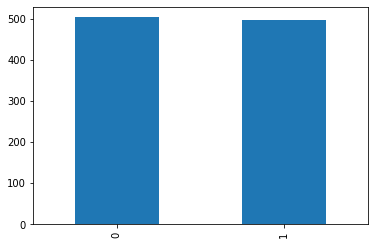

In [ ]:
df['class'].value_counts().plot(kind='bar')

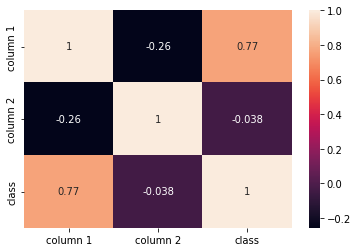

In [ ]:
sb.heatmap(df.corr(), annot=True)

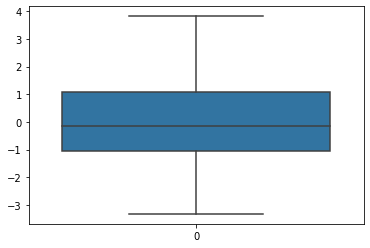

In [ ]:
sb.boxplot(data=df['column 1'])

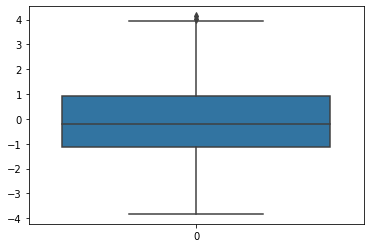

In [ ]:
sb.boxplot(data=df['column 2'])

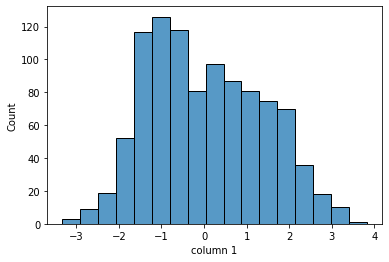

In [ ]:
sb.histplot(df['column 1'])

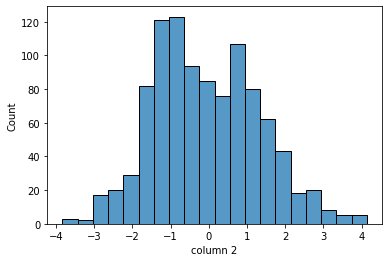

In [ ]:
sb.histplot(df['column 2'])

#### Labels

In [ ]:
labels = df.pop('class')

In [ ]:
labels = np.array(labels).reshape(labels.shape[0], 1)

In [ ]:
labels

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [ ]:
labels.shape

(1000, 1)

#### Adding 1's to data for that bias weight theta_0

In [ ]:
df = np.array(df)

In [ ]:
df

array([[-1.99415493, -0.76680416],
       [-2.53487433, -0.69067313],
       [ 0.88414553, -0.32460812],
       ...,
       [ 0.97810528, -1.77030175],
       [ 2.30710968,  2.05157259],
       [-0.31467723, -0.0888738 ]])

In [ ]:
df = np.hstack((np.ones((df.shape[0], 1)), df))

#### Splitting in train-test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.3, shuffle=True, stratify=labels)

In [ ]:
x_train

array([[ 1.        , -0.32099735, -0.08272032],
       [ 1.        ,  0.90000219,  0.93949725],
       [ 1.        , -0.4224385 ,  0.76914758],
       ...,
       [ 1.        , -0.45109616, -1.09339583],
       [ 1.        , -0.91485413, -1.03710988],
       [ 1.        , -0.76423429,  1.12349422]])

In [ ]:
x_train.shape

(700, 3)

#### Theta

In [ ]:
theta_initial = np.zeros((x_train.shape[1], 1))

In [ ]:
theta_initial

array([[0.],
       [0.],
       [0.]])

## Hypothesis function

#### h = 1/(1+exp(-(hypothesis of linear regression)))

#### = 1/(1+exp(-(X @ theta)))

In [ ]:
def hypothesis(X, theta):
    linear = X @ theta
    h = 1/(1 + np.exp(-(linear)))
    return h

## Binary Cross Entropy or Minimize log likelihood

#### -1/m * sum((y * log_e(h)) + ((1-y) * log(1-h)))

In [ ]:
def cost_function(h, labels):
     first_part = np.log(h).transpose() @ labels
     second_part = np.log(1-h).transpose() @ (1-labels)

     cf = -((first_part + second_part)/h.shape[0])
     return cf

## Gradient Descent

#### X(h-y) / m

In [ ]:
def gradient_descent(X, h, labels):
    grad = (X.transpose() @ (h-labels))/X.shape[0]
    return grad

In [ ]:
X = x_train.copy()
theta = theta_initial.copy()
labels = y_train

In [ ]:
X = X
theta = theta
labels = labels
learning_rate = 0.1
all_cost = []
all_thetas = []
all_h = []
n_epochs = 5000
all_grad = []
grad = np.array([[1.0], [1.0], [1.0]])
count = 0
for _ in range(n_epochs):
# while round(grad[0][0]) != 0 or round(grad[1][0]) != 0 or round(grad[2][0]) != 0: # Repeat until convergence i.e. gradient ~ 0
    # Calculate hypothesis function
    h = hypothesis(X, theta)
    all_h.append(h)
    
    # Caluclate the cost function
    loss = cost_function(h, labels)
    # print(loss)
    all_cost.append(loss)

    # Calculate the gradien descent
    grad_descent = gradient_descent(X, h, labels)
    all_grad.append(grad_descent)
    grad = grad_descent
    # print(grad_descent)

    if loss < 0:
        # Update the theta
        theta = theta + (learning_rate * grad_descent)
        all_thetas.append(theta)
    elif loss > 0:
        # Update the theta
        theta = theta - (learning_rate * grad_descent)
        all_thetas.append(theta)
    

    count += 1

    


In [ ]:
count

5000

In [ ]:
all_grad[0]

array([[ 0.00142857],
       [-0.49229453],
       [ 0.00782842]])

In [ ]:
all_cost

[array([[0.69314718]]),
 array([[0.69072846]]),
 array([[0.68833144]]),
 array([[0.68595591]]),
 array([[0.68360169]]),
 array([[0.68126857]]),
 array([[0.67895636]]),
 array([[0.67666486]]),
 array([[0.67439387]]),
 array([[0.6721432]]),
 array([[0.66991265]]),
 array([[0.66770204]]),
 array([[0.66551116]]),
 array([[0.66333984]]),
 array([[0.66118788]]),
 array([[0.65905509]]),
 array([[0.65694129]]),
 array([[0.65484629]]),
 array([[0.6527699]]),
 array([[0.65071194]]),
 array([[0.64867223]]),
 array([[0.64665059]]),
 array([[0.64464684]]),
 array([[0.6426608]]),
 array([[0.64069229]]),
 array([[0.63874114]]),
 array([[0.63680717]]),
 array([[0.63489021]]),
 array([[0.63299009]]),
 array([[0.63110664]]),
 array([[0.62923968]]),
 array([[0.62738905]]),
 array([[0.62555459]]),
 array([[0.62373613]]),
 array([[0.6219335]]),
 array([[0.62014655]]),
 array([[0.61837511]]),
 array([[0.61661902]]),
 array([[0.61487813]]),
 array([[0.61315228]]),
 array([[0.61144132]]),
 array([[0.60974508]

In [ ]:
px.line(x=list(range(len(all_grad))), y=[[item[0][0] for item in all_grad], [item[1][0] for item in all_grad], [item[2][0] for item in all_grad]]).show()

In [ ]:
px.scatter(x=list(range(len(all_cost))), y=[item[0][0] for item in all_cost]).show()

#### Evaluation

In [ ]:
x_test

array([[ 1.00000000e+00, -1.46908556e+00,  1.58022600e+00],
       [ 1.00000000e+00, -1.93199425e+00, -7.90660706e-01],
       [ 1.00000000e+00,  1.31973535e-01, -1.63994858e+00],
       [ 1.00000000e+00, -9.95651897e-01,  7.66832115e-01],
       [ 1.00000000e+00,  3.18883625e-03,  1.79657963e-01],
       [ 1.00000000e+00, -1.65734210e+00,  7.50551709e-01],
       [ 1.00000000e+00, -7.19799426e-01, -5.65386572e-01],
       [ 1.00000000e+00, -2.18359309e+00,  7.22614022e-01],
       [ 1.00000000e+00, -1.34366547e+00,  9.77789078e-01],
       [ 1.00000000e+00, -1.56709182e+00,  9.46828233e-01],
       [ 1.00000000e+00, -1.52828582e+00, -8.69458310e-01],
       [ 1.00000000e+00, -2.90511630e-01,  1.04330099e+00],
       [ 1.00000000e+00, -1.25436395e+00, -9.59875758e-01],
       [ 1.00000000e+00,  7.55267199e-01,  7.79891426e-01],
       [ 1.00000000e+00,  1.37124407e-02, -2.06774975e+00],
       [ 1.00000000e+00,  3.11058203e+00,  2.73018264e+00],
       [ 1.00000000e+00,  1.55223791e+00

In [ ]:
theta

array([[-0.00510421],
       [ 2.37472174],
       [-0.45351835]])

In [ ]:
pred = hypothesis(x_test, theta)

In [ ]:
pred = [0 if item < 0.5 else 1 for item in pred]

In [ ]:
pred

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
[item[0] for item in y_test]

[0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,


In [ ]:
confusion_matrix(y_test, pred)

array([[124,  26],
       [ 24, 126]])

In [ ]:
classification_report(y_test, pred, output_dict=True)

{'0': {'f1-score': 0.8322147651006713,
  'precision': 0.8378378378378378,
  'recall': 0.8266666666666667,
  'support': 150},
 '1': {'f1-score': 0.8344370860927153,
  'precision': 0.8289473684210527,
  'recall': 0.84,
  'support': 150},
 'accuracy': 0.8333333333333334,
 'macro avg': {'f1-score': 0.8333259255966933,
  'precision': 0.8333926031294452,
  'recall': 0.8333333333333333,
  'support': 300},
 'weighted avg': {'f1-score': 0.8333259255966933,
  'precision': 0.8333926031294453,
  'recall': 0.8333333333333334,
  'support': 300}}

In [ ]:
roc_auc_score(y_test, pred)

0.8333333333333333

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [ ]:
fpr, tpr, thresholds

(array([0.        , 0.17333333, 1.        ]),
 array([0.  , 0.84, 1.  ]),
 array([2, 1, 0]))

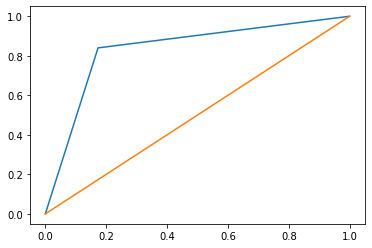

In [ ]:
sb.lineplot(x=fpr, y=tpr)
sb.lineplot(x=[0, 1], y=[0, 1])